#### Importing Required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


#### Reading & Previewing dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/flights.csv', low_memory=False)
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Subsetting only 100000 rows for analysis

In [ ]:
df = df[0:100000]

#### Shape of dataset

In [ ]:
df.shape

(100000, 31)

#### Info of datasset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

#### Unique counts of 'DIVERTED' columns, wheather 0 indicate Not Diverted and 1 is Diverted.

In [ ]:
df.value_counts('DIVERTED')

DIVERTED
0    99776
1      224
dtype: int64

#### Jointplot of 'SCHEDULED_ARRIVAL' and 'ARRIVAL_TIME'

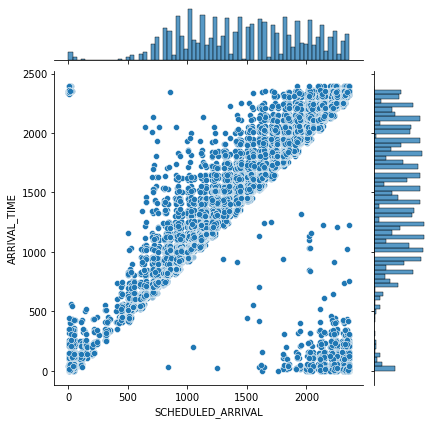

In [ ]:
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

#### Correlation

In [ ]:
df.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.497084,0.004412,-0.138130,-0.124369,0.060064,0.093451,-0.119781,...,-0.110820,-0.091687,0.070770,0.004847,-0.006000,0.097693,-0.010550,-0.001603,0.033213,0.061960
DAY_OF_WEEK,NaN,NaN,-0.497084,1.000000,0.010955,0.046914,0.045182,0.055632,0.007291,0.044150,...,0.031725,0.011477,0.067520,-0.000709,-0.006409,-0.019626,0.008156,0.003648,0.033729,-0.050835
FLIGHT_NUMBER,NaN,NaN,0.004412,0.010955,1.000000,-0.003027,0.010140,0.034863,0.061010,0.016377,...,-0.018891,0.000753,0.056163,0.007155,0.090008,-0.032564,-0.007260,0.023770,0.076581,0.004246
SCHEDULED_DEPARTURE,NaN,NaN,-0.138130,0.046914,-0.003027,1.000000,0.943186,0.174254,-0.081496,0.912232,...,0.731240,0.552653,0.154951,0.002515,-0.002631,-0.112393,-0.017957,-0.054419,0.186286,-0.042004
DEPARTURE_TIME,NaN,NaN,-0.124369,0.045182,0.010140,0.943186,1.000000,0.243960,-0.070081,0.966477,...,0.734970,0.584615,0.223654,0.006576,0.009679,-0.093096,-0.012820,-0.013304,0.247325,-0.046406
DEPARTURE_DELAY,NaN,NaN,0.060064,0.055632,0.034863,0.174254,0.243960,1.000000,0.061905,0.231399,...,0.155150,0.079639,0.950838,0.020787,0.030862,0.085794,0.008040,0.606954,0.605289,0.210402
TAXI_OUT,NaN,NaN,0.093451,0.007291,0.061010,-0.081496,-0.070081,0.061905,1.000000,-0.043114,...,-0.062325,-0.045611,0.245363,0.009810,0.010763,0.407371,-0.008021,-0.024674,-0.129879,0.119412
WHEELS_OFF,NaN,NaN,-0.119781,0.044150,0.016377,0.912232,0.966477,0.231399,-0.043114,1.000000,...,0.744697,0.608611,0.217344,0.006524,0.001293,-0.085582,-0.013912,-0.017376,0.223010,-0.055273


#### Correlation of features with 'ARRIVAL_DELAY'

In [ ]:
df[df.columns[1:]].corr()['ARRIVAL_DELAY'][:].sort_values(ascending=False)

ARRIVAL_DELAY          1.000000
DEPARTURE_DELAY        0.950838
AIRLINE_DELAY          0.592718
LATE_AIRCRAFT_DELAY    0.572956
AIR_SYSTEM_DELAY       0.259700
TAXI_OUT               0.245363
WEATHER_DELAY          0.235906
DEPARTURE_TIME         0.223654
WHEELS_OFF             0.217344
TAXI_IN                0.170073
SCHEDULED_DEPARTURE    0.154951
SCHEDULED_ARRIVAL      0.140565
WHEELS_ON              0.088131
ARRIVAL_TIME           0.076791
DAY                    0.070770
DAY_OF_WEEK            0.067520
FLIGHT_NUMBER          0.056163
ELAPSED_TIME           0.048448
SECURITY_DELAY         0.006070
AIR_TIME              -0.002742
SCHEDULED_TIME        -0.022043
DISTANCE              -0.023821
MONTH                       NaN
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

#### Droping unwwanted columns (i.e not highly co-related)

In [ ]:
df=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT', 'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME', 'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'], axis=1)

In [ ]:
#### Remaining columns after droping inwanted columns

In [ ]:
df.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

#### Shape of dataset

In [ ]:
df.shape

(100000, 16)

#### Identifying Null values in dataset

In [ ]:
df.isna().sum()

MONTH                      0
DAY                        0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_DELAY         2298
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

#### Replacing Null values with mean

In [ ]:
df=df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df.isna().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

#### Confuction Matrix using Heatmap

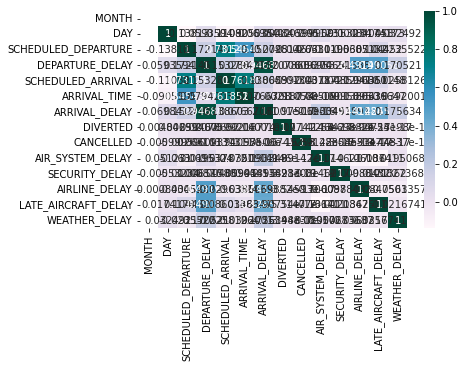

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="PuBuGn" ,fmt='g')

In [ ]:
result=[]
for row in df['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)  

In [ ]:
df['result'] = result

#### Preview after adding new column 'result'

In [ ]:
df.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [ ]:
#### Unique counts of 'result' columns, wheather 0 indicate        and 1 is       .

In [ ]:
df['result'].value_counts()

0    63779
1    36221
Name: result, dtype: int64

#### Selecting only following columns for Model Building.
>'MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY', 'result'

In [ ]:
df=df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
df.columns

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'result'],
      dtype='object')

#### Splitting Dataset into Training and Testing with 70:30 ratio and with random_state = 42

In [ ]:
df = df.values
X, y = df[:,:-1], df[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Feature Scalling

In [ ]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

#### Model: DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
pred = clf.predict_proba(X_test)

#### AUC score of Model

In [ ]:
auc_score = roc_auc_score(y_test, pred[:,1])
auc_score

0.9981162357043479

In [ ]:
print('AUC Score of Model is: {} %'.format(round(auc_score*100,2)))

AUC Score of Model is: 99.81 %


#### Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = confusion_matrix(y_test, pred[:,1])
print("Confusion Matrix:")
print(result1)
print('')
result2 = classification_report(y_test, pred[:,1])
print("Classification Report:",)
print (result2)
result3 = accuracy_score(y_test,pred[:,1])
print("Accuracy:",result3)

Confusion Matrix:
[[19119    21]
 [   29 10831]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19140
         1.0       1.00      1.00      1.00     10860

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Accuracy: 0.9983333333333333


Text(0.5, 257.44, 'Predicted label')

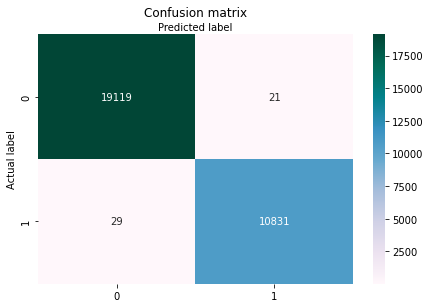

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(result1), annot=True, cmap="PuBuGn" ,fmt='g')## visualized confusion matrix using heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Receiver Operating Characteristic (ROC) curve of DecisionTreeClassifier

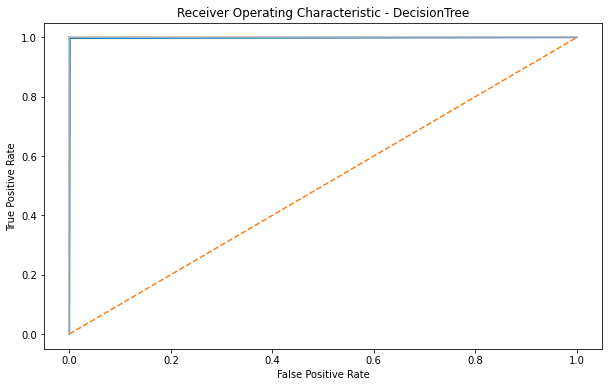

In [ ]:
plt.subplots(1, figsize=(10,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Accuracy, Precision, and Recall achived by model.

In [ ]:
print("Accuracy Achieved:",round(metrics.accuracy_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Precision Achieved:",round(metrics.precision_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Recall Achieved:",round(metrics.recall_score(y_test, pred[:,1])*100,2),'%')

Accuracy Achieved: 99.83 %
 
Precision Achieved: 99.81 %
 
Recall Achieved: 99.73 %
